<a href="https://colab.research.google.com/github/mjavadpur/Regression/blob/main/RegSes3MJavadpur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Workshop/Regression/BreastCancer'
os.environ['KAGGLE_USERNAME'] = "mjavadpur" # username from the json file
os.environ['KAGGLE_KEY'] = "3e9baf1e03d7cb7e8976be19949d267a" # key from the json file

In [ ]:
%cd /content/drive/MyDrive/Workshop/Regression/BreastCancer

/content/drive/MyDrive/Workshop/Regression/BreastCancer


In [ ]:
!kaggle datasets download -d utkarshx27/breast-cancer-dataset-used-royston-and-altman

breast-cancer-dataset-used-royston-and-altman.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# %%capture
!unzip /content/drive/MyDrive/Workshop/Regression/BreastCancer/breast-cancer-dataset-used-royston-and-altman.zip -d /content/drive/MyDrive/Workshop/Regression/BreastCancer

Archive:  /content/drive/MyDrive/Workshop/Regression/BreastCancer/breast-cancer-dataset-used-royston-and-altman.zip
replace /content/drive/MyDrive/Workshop/Regression/BreastCancer/gbsg.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# **A data set with 686 observations and 11 variables.**

### **Columns	Description**
pid	: patient identifier

age	: age, years

meno	: menopausal status (0= premenopausal, 1= postmenopausal)

size	: tumor size, mm

grade	: tumor grade

nodes	: number of positive lymph nodes

pgr	: progesterone receptors (fmol/l)

er	: estrogen receptors (fmol/l)

hormon	: hormonal therapy, 0= no, 1= yes

rfstime	: recurrence free survival time; days to first of recurrence, death or last follow-up

status	: 0= alive without recurrence, 1= recurrence or death

# **Import Important python library**

In [ ]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.metrics import ConfusionMatrixDisplay
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler  
from sklearn.metrics import r2_score, mean_squared_error
# ,accuracy_score, plot_confusion_matrix

# **Import dataset**

In [88]:
df = pd.read_csv('/content/drive/MyDrive/Workshop/Regression/BreastCancer/gbsg.csv')

df

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0
...,...,...,...,...,...,...,...,...,...,...,...,...
681,682,586,51,0,30,3,2,1152,38,1,1760,0
682,683,1273,64,1,26,2,2,1356,1144,1,1152,0
683,684,1525,57,1,35,3,1,1490,209,1,1342,0
684,685,736,44,0,21,2,3,1600,70,0,629,0


In [89]:
df.drop(['Unnamed: 0','pid'],axis = 1,inplace=True)

In [90]:
df.head()

,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,49,0,18,2,2,0,0,0,1838,0
1,55,1,20,3,16,0,0,0,403,1
2,56,1,40,3,3,0,0,0,1603,0
3,45,0,25,3,1,0,4,0,177,0
4,65,1,30,2,5,0,36,1,1855,0


# **Get some information about dataset**

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,686.0,53.052478,10.120739,21.0,46.00,53.0,61.00,80.0
meno,686.0,0.577259,0.494355,0.0,0.00,1.0,1.00,1.0
size,686.0,29.329446,14.296217,3.0,20.00,25.0,35.00,120.0
grade,686.0,2.116618,0.582808,1.0,2.00,2.0,2.00,3.0
nodes,686.0,5.010204,5.475483,1.0,1.00,3.0,7.00,51.0
pgr,686.0,109.995627,202.331552,0.0,7.00,32.5,131.75,2380.0
er,686.0,96.252187,153.083963,0.0,8.00,36.0,114.00,1144.0
hormon,686.0,0.358601,0.479940,0.0,0.00,0.0,1.00,1.0
rfstime,686.0,1124.489796,642.791948,8.0,567.75,1084.0,1684.75,2659.0
status,686.0,0.435860,0.496231,0.0,0.00,0.0,1.00,1.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      686 non-null    int64
 1   meno     686 non-null    int64
 2   size     686 non-null    int64
 3   grade    686 non-null    int64
 4   nodes    686 non-null    int64
 5   pgr      686 non-null    int64
 6   er       686 non-null    int64
 7   hormon   686 non-null    int64
 8   rfstime  686 non-null    int64
 9   status   686 non-null    int64
dtypes: int64(10)
memory usage: 53.7 KB


In [93]:
df.columns

Index(['age', 'meno', 'size', 'grade', 'nodes', 'pgr', 'er', 'hormon',
       'rfstime', 'status'],
      dtype='object')

In [94]:
df.shape

(686, 10)

In [95]:
df.isnull().sum()

age        0
meno       0
size       0
grade      0
nodes      0
pgr        0
er         0
hormon     0
rfstime    0
status     0
dtype: int64

In [96]:
print(df['grade'].unique())
print(df['hormon'].unique())
print(df['status'].unique())

[2 3 1]
[0 1]
[0 1]


Create grade categorical column

In [ ]:
# def grade_to_cat(grade: float) -> str:
#     if grade == 1 : return 'grade1'
#     elif grade == 2 : return 'grade2'
#     elif grade == 3 : return 'grade3'
    
# df.insert(5, 'grade_cat', df['grade'].apply(grade_to_cat))
# df.head()

Create hormon categorical column

In [ ]:
# def hormon_to_cat(hormon: float) -> str:
#     if hormon == 1 : return 'YES'
#     elif hormon == 0 : return 'NO'
    
# df.insert(10, 'hormon_cat', df['hormon'].apply(hormon_to_cat))
# df.head()

Create status categorical column

In [ ]:
# def status_to_cat(status: float) -> str:
#     if status == 1 : return 'YES'
#     elif status == 0 : return 'NO'
    
# df.insert(13, 'status_cat', df['status'].apply(status_to_cat))
# df.head()

In [97]:
df_sorted = df.sort_values(by='size', ascending=False)
df_sorted['size']

136    120
478    100
556    100
448    100
60      80
      ... 
92       7
685      7
212      5
670      4
240      3
Name: size, Length: 686, dtype: int64

In [98]:
# categorical size column
bins = [-1, 25, 50, 75, 100, 125]
labels = ['very small', 'small', 'medium', 'large', 'very large']
# df['size_category'] = pd.cut(df['size'], bins=bins, labels=labels)

df.insert(4, 'size_cat', pd.cut(df['size'], bins=bins, labels=labels))
df.head()

,age,meno,size,grade,size_cat,nodes,pgr,er,hormon,rfstime,status
0,49,0,18,2,very small,2,0,0,0,1838,0
1,55,1,20,3,very small,16,0,0,0,403,1
2,56,1,40,3,small,3,0,0,0,1603,0
3,45,0,25,3,very small,1,0,4,0,177,0
4,65,1,30,2,small,5,0,36,1,1855,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       686 non-null    int64   
 1   meno      686 non-null    int64   
 2   size      686 non-null    int64   
 3   grade     686 non-null    int64   
 4   size_cat  686 non-null    category
 5   nodes     686 non-null    int64   
 6   pgr       686 non-null    int64   
 7   er        686 non-null    int64   
 8   hormon    686 non-null    int64   
 9   rfstime   686 non-null    int64   
 10  status    686 non-null    int64   
dtypes: category(1), int64(10)
memory usage: 54.6 KB


In [105]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if (df[col].dtype == 'object' or df[col].dtype == 'category')]
num_cols = [col for col in df.columns if (df[col].dtype != 'object' and df[col].dtype != 'category')]

unique values in categorical columns

In [106]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

size_cat has ['very small', 'small', 'medium', 'large', 'very large']
Categories (5, object): ['very small' < 'small' < 'medium' < 'large' < 'very large'] values



# **Scatter** **Report**

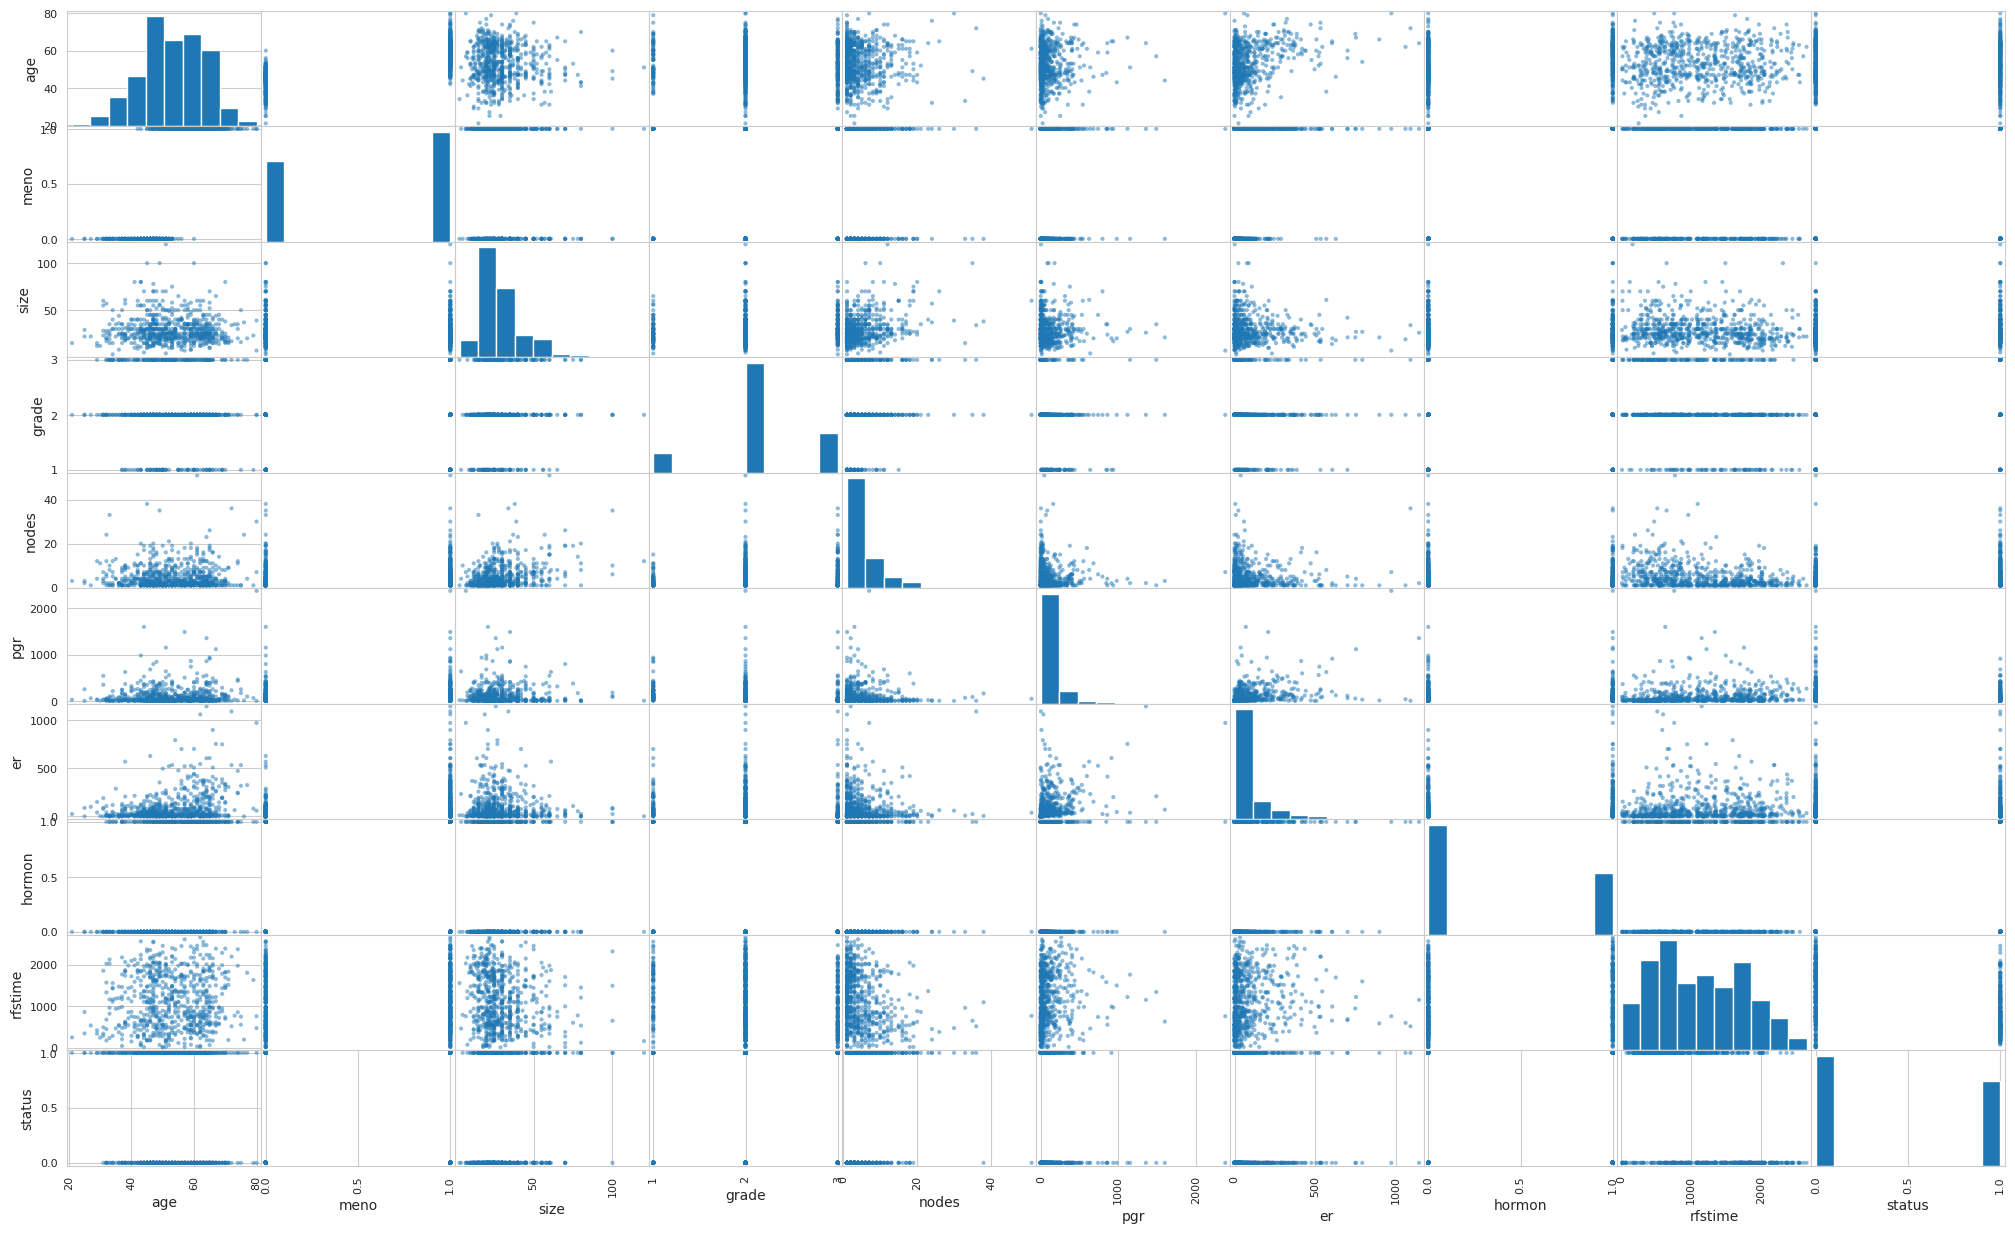

In [107]:
pd.plotting.scatter_matrix(df, figsize=(25,15), alpha=0.5)
plt.show()

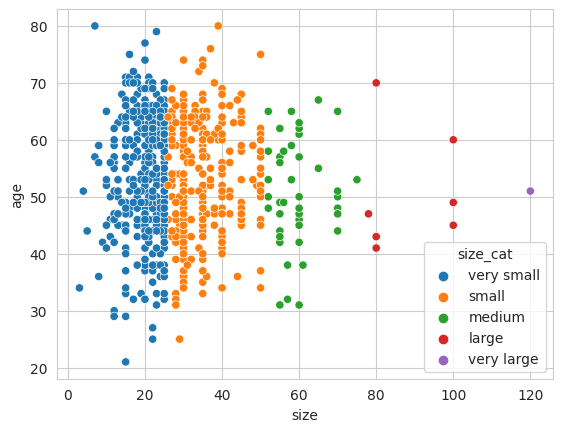

In [108]:
fig = sns.scatterplot(df, x="size", y="age", hue="size_cat")

# **Correlation**

In [109]:
corr=df.corr()
corr

<ipython-input-109-7d5195e2bf4d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
age,1.000000,0.770076,-0.045412,-0.072318,0.032709,0.084355,0.323132,0.263906,0.053958,-0.004270
meno,0.770076,1.000000,-0.042027,-0.036384,0.023169,0.018649,0.258860,0.276847,0.024712,0.044034
size,-0.045412,-0.042027,1.000000,0.103488,0.327665,-0.027415,-0.081766,-0.027456,-0.138376,0.130978
grade,-0.072318,-0.036384,0.103488,1.000000,0.144187,-0.180905,-0.119663,-0.061001,-0.171505,0.131904
nodes,0.032709,0.023169,0.327665,0.144187,1.000000,-0.072534,-0.043183,0.016382,-0.256751,0.242287
pgr,0.084355,0.018649,-0.027415,-0.180905,-0.072534,1.000000,0.392601,0.052874,0.102729,-0.171596
er,0.323132,0.258860,-0.081766,-0.119663,-0.043183,0.392601,1.000000,0.144512,0.065477,-0.061561
hormon,0.263906,0.276847,-0.027456,-0.061001,0.016382,0.052874,0.144512,1.000000,0.134838,-0.081044
rfstime,0.053958,0.024712,-0.138376,-0.171505,-0.256751,0.102729,0.065477,0.134838,1.000000,-0.447103
status,-0.004270,0.044034,0.130978,0.131904,0.242287,-0.171596,-0.061561,-0.081044,-0.447103,1.000000


# **Data** **Visulization**

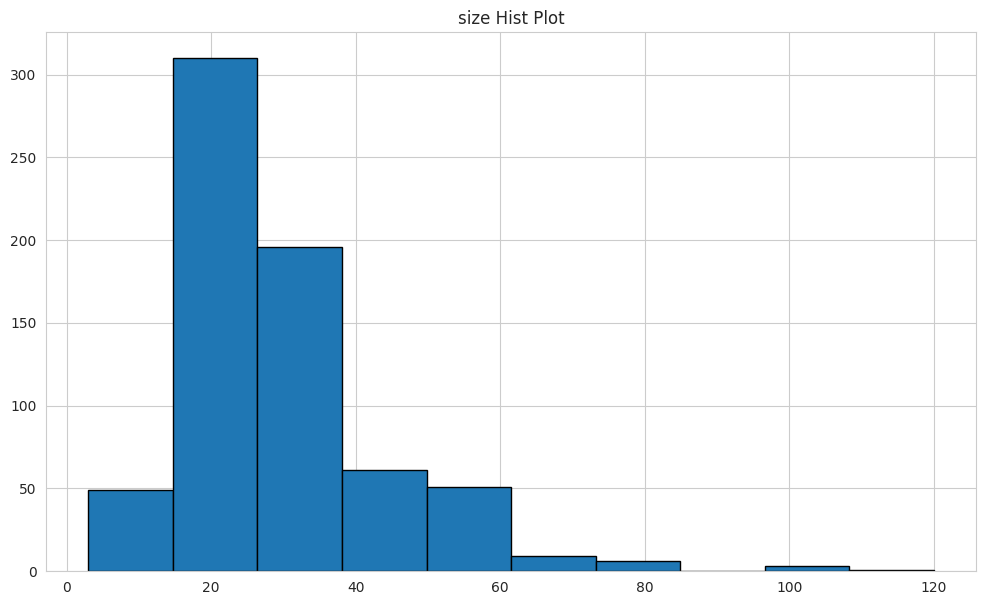

In [110]:
plt.figure(figsize=(12,7))
plt.hist("size",data=df, edgecolor="k")
plt.title("size Hist Plot")
plt.show()

In [111]:
df.columns

Index(['age', 'meno', 'size', 'grade', 'size_cat', 'nodes', 'pgr', 'er',
       'hormon', 'rfstime', 'status'],
      dtype='object')

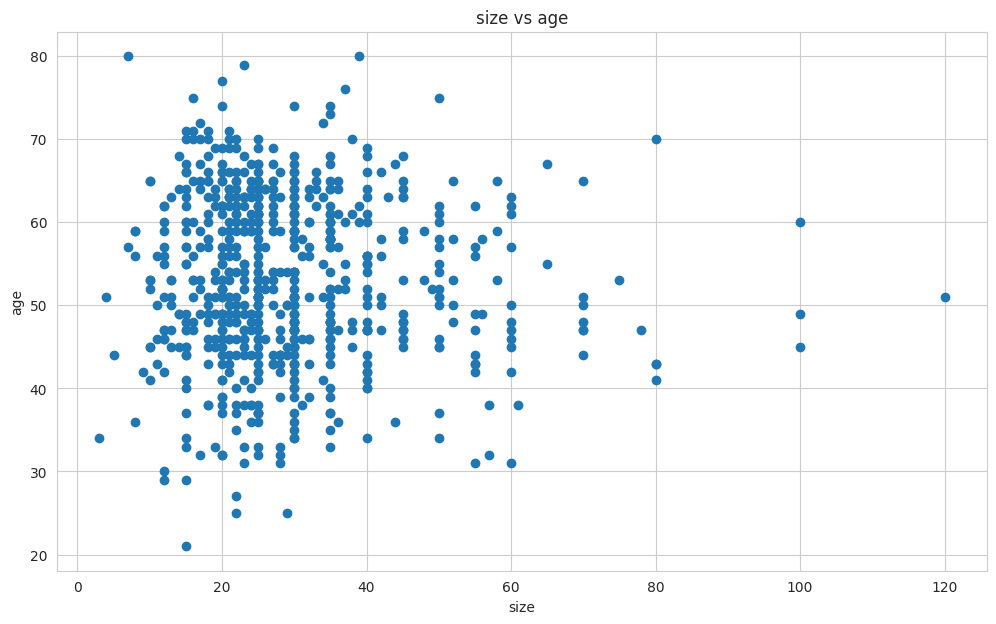

In [112]:
plt.figure(figsize=(12,7))
plt.scatter("size","age",data=df,)
plt.title("size vs age")
plt.xlabel("size")
plt.ylabel("age")
plt.show()

<Axes: xlabel='age', ylabel='size'>

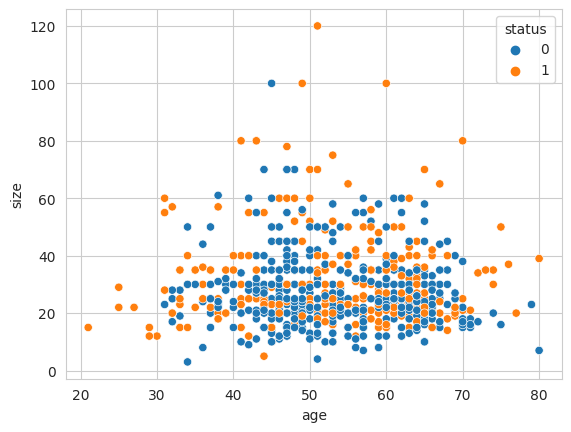

In [114]:
sns.scatterplot(data=df, x='age', y='size', hue='status') #0= alive without recurrence, 1= recurrence or death

<Axes: xlabel='status', ylabel='count'>

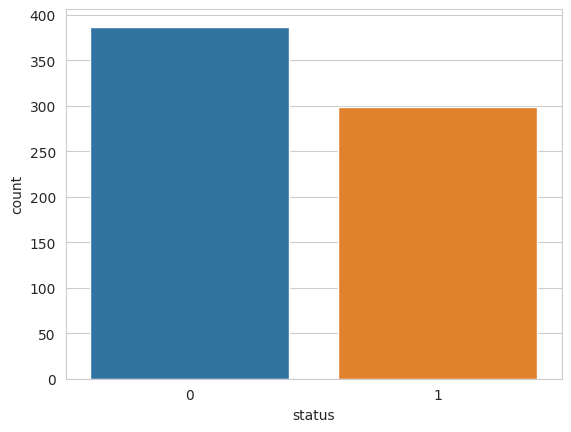

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'status', data=df)

<Axes: xlabel='size_cat', ylabel='count'>

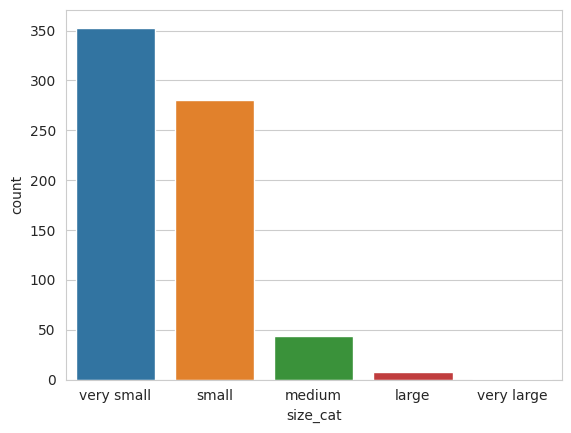

In [119]:
sns.set_style('whitegrid')
sns.countplot(x = 'size_cat', data=df)

In [120]:
pd.crosstab(df.age, df.size_cat, margins = True)

size_cat,very small,small,medium,large,very large,All
age,,,,,,
21,1,0,0,0,0,1
25,1,1,0,0,0,2
27,1,0,0,0,0,1
29,2,0,0,0,0,2
30,1,0,0,0,0,1
31,1,1,2,0,0,4
32,4,1,1,0,0,6
33,4,2,0,0,0,6
34,2,4,0,0,0,6


In [121]:
pd.crosstab(df.hormon, df.size_cat, margins = True)


size_cat,very small,small,medium,large,very large,All
hormon,,,,,,
0,221,180,34,4,1,440
1,132,100,10,4,0,246
All,353,280,44,8,1,686


In [122]:
fig = px.box(df, x="hormon", y="age", color="size_cat")
fig.show()

In [124]:
fig = px.histogram(df, x='age', color='size_cat', barmode='group', facet_col='status')
fig.show()

In [126]:
fig = px.histogram(df, x='hormon', color='size_cat', barmode='group', facet_col='status')
fig.show()

# **Correlation Report with heatmap visualization**

<ipython-input-125-c9551a9462d4>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

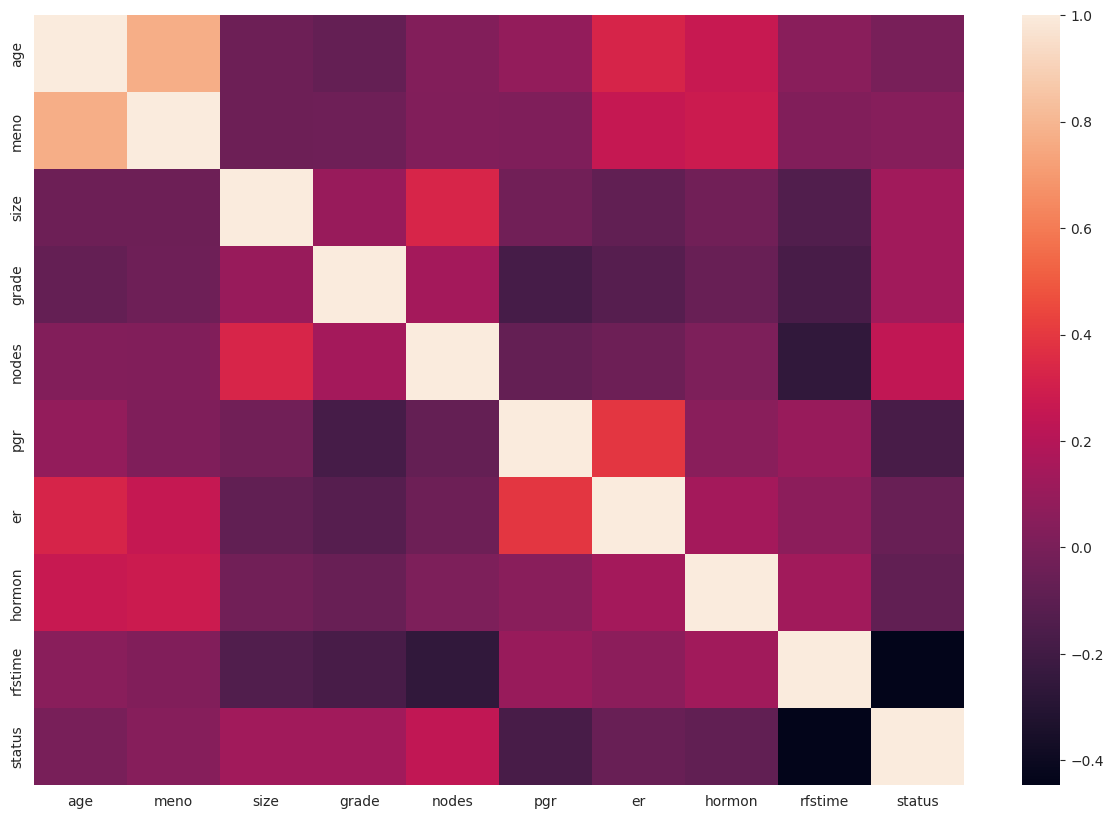

In [125]:
corr=df.corr()
plt.figure (figsize=(15,10))
sns.heatmap(corr)


#**Build** **Model**

In [127]:
X=df.drop(columns=['status'])
X

,age,meno,size,grade,size_cat,nodes,pgr,er,hormon,rfstime
0,49,0,18,2,very small,2,0,0,0,1838
1,55,1,20,3,very small,16,0,0,0,403
2,56,1,40,3,small,3,0,0,0,1603
3,45,0,25,3,very small,1,0,4,0,177
4,65,1,30,2,small,5,0,36,1,1855
...,...,...,...,...,...,...,...,...,...,...
681,51,0,30,3,small,2,1152,38,1,1760
682,64,1,26,2,small,2,1356,1144,1,1152
683,57,1,35,3,small,1,1490,209,1,1342
684,44,0,21,2,very small,3,1600,70,0,629


# **Simple Regression Model**

In [128]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

In [129]:
df.columns

Index(['age', 'meno', 'size', 'grade', 'size_cat', 'nodes', 'pgr', 'er',
       'hormon', 'rfstime', 'status'],
      dtype='object')

In [130]:
x = df['size']
y = df['status']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [131]:
slr.fit(x_train.values.reshape(-1,1), y_train)



LinearRegression()

In [132]:
slr.coef_

array([0.00379156])

In [133]:
slr.intercept_

0.3221141617416024

In [134]:
slr_pred = slr.predict(x_test.values.reshape(-1,1))

In [135]:
fig = px.scatter(x=y_test, y=slr_pred, labels={'x':'Actual','y':'Predicted'})
fig.show()

In [136]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,slr_pred)
rmse = np.sqrt(mean_squared_error(y_test,slr_pred))
r2 = np.abs(r2_score(y_test,slr_pred))

print('MSE:',mse)
print('RMSE:',rmse)
print('R square:',r2)

MSE: 0.23985841263171817
RMSE: 0.48975342023483426
R square: 0.02736439575350269


In [138]:
px.scatter(df, x='size', y='status', trendline='ols', trendline_color_override = 'red')